In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data2 = pd.read_csv("data/brca_data_w_subtypes.csv")
data2.head()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status,PR.Status,ER.Status,HER2.Final.Status,histological.type
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0,Positive,Positive,Negative,infiltrating ductal carcinoma
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,0.279067,0.292925,-0.155242,-0.089365,0.267530,0,Positive,Negative,Negative,infiltrating ductal carcinoma
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0,Positive,Positive,Negative,infiltrating ductal carcinoma
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0,Positive,Positive,Negative,infiltrating ductal carcinoma
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0,Positive,Positive,Negative,infiltrating ductal carcinoma


In [5]:
data2.shape

(705, 1941)

In [3]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 1941 entries, rs_CLEC3A to histological.type
dtypes: float64(827), int64(1110), object(4)
memory usage: 10.4+ MB


In [6]:
column_names = ", ".join(data2.columns)
print("Columns in data2:\n")
print(column_names)

Columns in data2:

rs_CLEC3A, rs_CPB1, rs_SCGB2A2, rs_SCGB1D2, rs_TFF1, rs_MUCL1, rs_GSTM1, rs_PIP, rs_ADIPOQ, rs_ADH1B, rs_S100A7, rs_HMGCS2, rs_CYP2B7P1, rs_ANKRD30A, rs_PRAME, rs_TAT, rs_SERPINA6, rs_AGR3, rs_TFAP2B, rs_CYP4Z1, rs_DHRS2, rs_KCNJ3, rs_MYBPC1, rs_C4orf7, rs_KRT14, rs_MUC6, rs_UGT2B11, rs_GABRP, rs_SOX10, rs_SLC30A8, rs_STAC2, rs_VSTM2A, rs_COL2A1, rs_KRT5, rs_TUSC5, rs_CEACAM5, rs_CALML5, rs_GP2, rs_GSTT1, rs_LEP, rs_FABP7, rs_C1orf64, rs_CRABP1, rs_FABP4, rs_KRT6B, rs_KLK11, rs_CST9, rs_CST1, rs_PIGR, rs_CIDEC, rs_SYT13, rs_KLK5, rs_OLFM4, rs_HOXB13, rs_LTF, rs_TFF3, rs_MUC5B, rs_BMPR1B, rs_CEACAM6, rs_TCN1, rs_SLC34A2, rs_CRISP3, rs_CLCA2, rs_AGR2, rs_ABCC11, rs_GRIA2, rs_KRT17, rs_NPY1R, rs_C20orf114, rs_DSG3, rs_OBP2B, rs_KIF1A, rs_CYP4F8, rs_TNNT1, rs_LRP2, rs_PROM1, rs_PVALB, rs_FAM5C, rs_ELF5, rs_GFRA1, rs_CYP2A6, rs_PGR, rs_CGA, rs_GPD1, rs_VGLL1, rs_PLIN1, rs_CP, rs_KCNC2, rs_MUC16, rs_KRT6A, rs_ALB, rs_AQP5, rs_WIF1, rs_KLK6, rs_KLK7, rs_CBLN2, rs_KRT81, rs_

In [4]:
missing = data2.isnull().sum()
missing = missing[missing>0]

if missing.empty:
    print("No missing values in the dataset")
else:
    print("Missing values detected: \n")
    print(missing)

Missing values detected: 

PR.Status            122
ER.Status            122
HER2.Final.Status    145
dtype: int64


In [7]:
for col in ['PR.Status', 'ER.Status', 'HER2.Final.Status']:
    data2[col] = data2[col].fillna(data2[col].mode()[0])

In [8]:
missing = data2.isnull().sum()
missing = missing[missing>0]

if missing.empty:
    print("No missing values in the dataset")
else:
    print("Missing values detected: \n")
    print(missing)

No missing values in the dataset


In [9]:
categorical_cols = data2.select_dtypes(include=['object']).columns
numerical_cols = data2.select_dtypes(include=['int64', 'float64']).columns


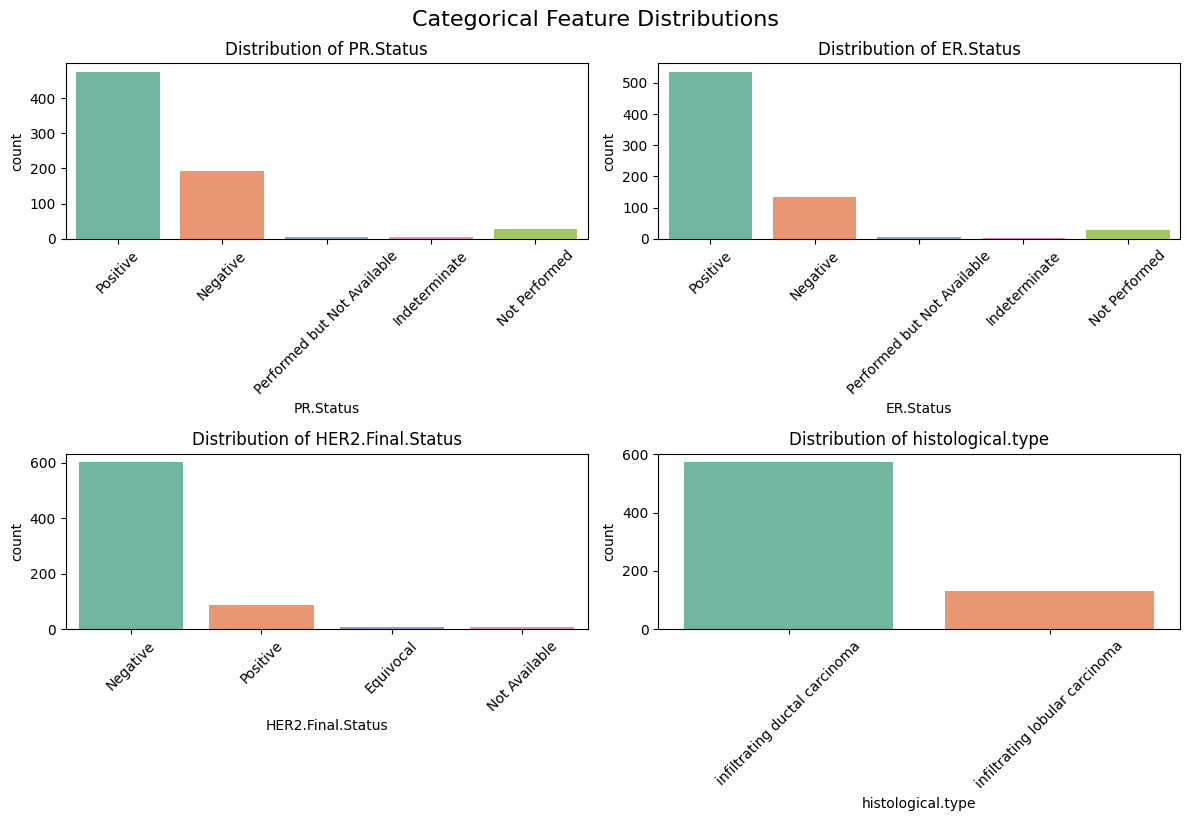

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data2, x=col, hue=col, palette='Set2', ax=axes[i], legend=False)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Categorical Feature Distributions", fontsize=16, y=1.02)
plt.show()


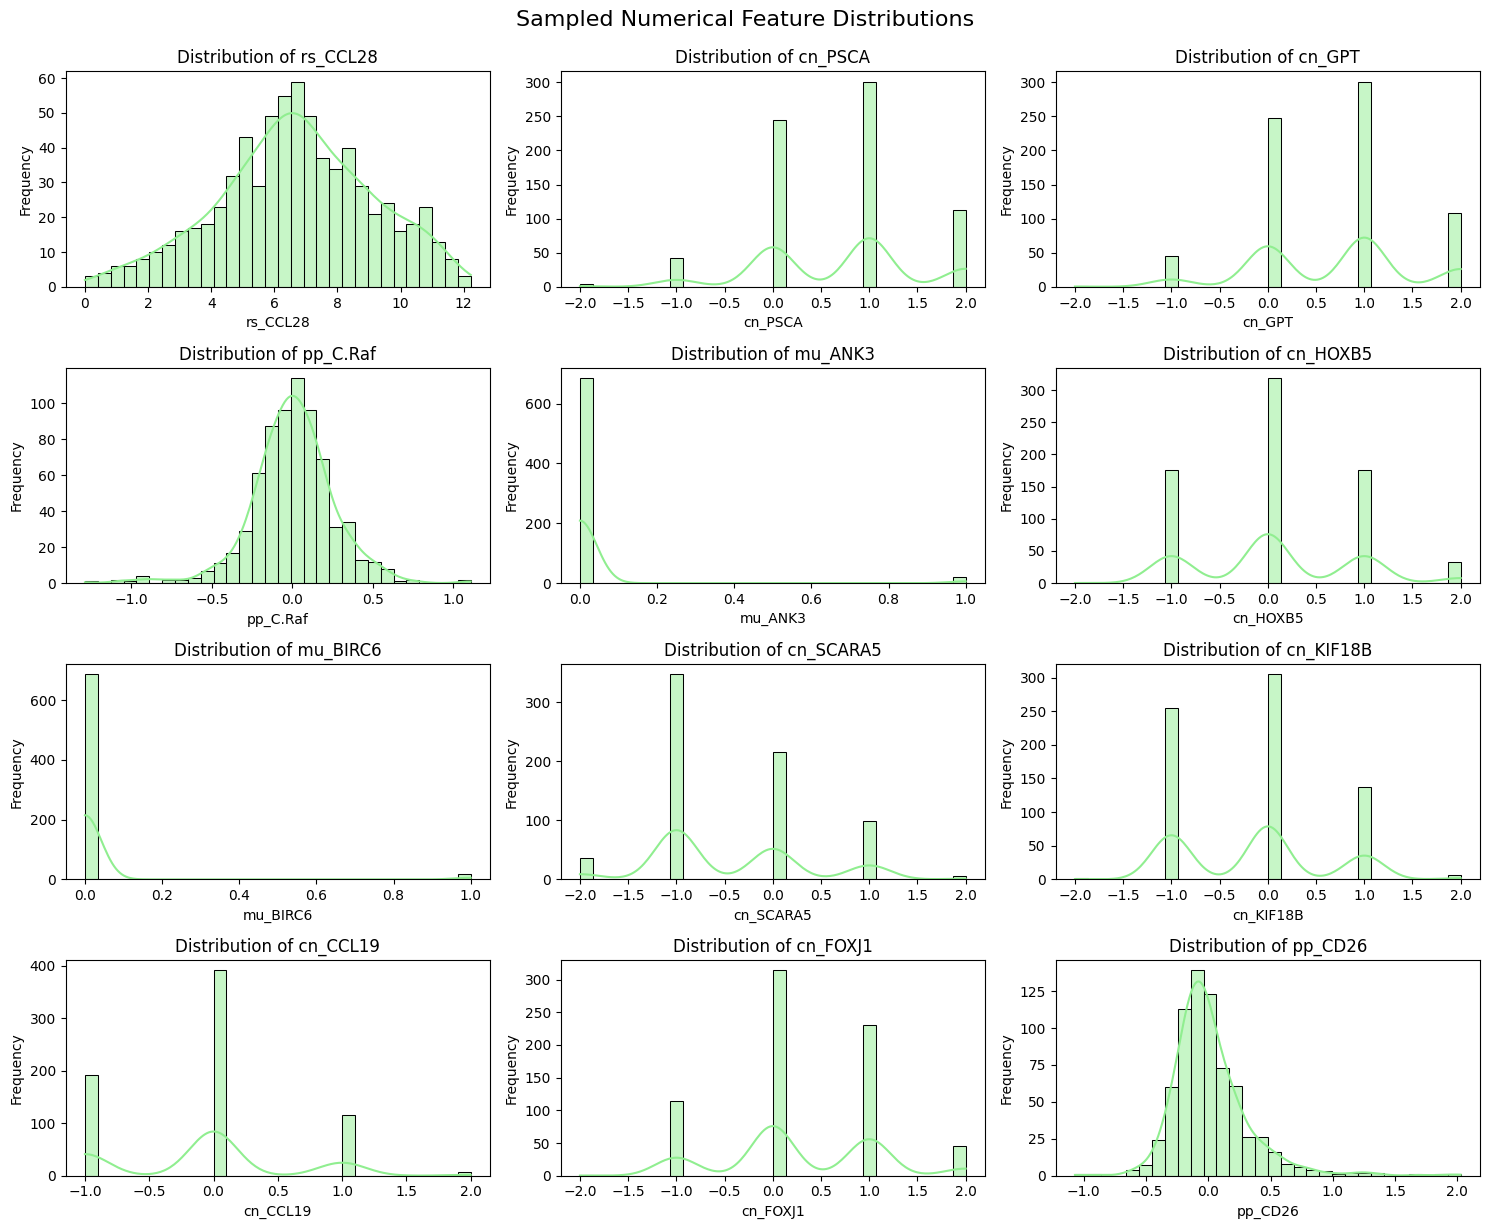

In [13]:
sampled_numerical_cols = numerical_cols.to_series().sample(n=12, random_state=42)
n_cols = 3
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(sampled_numerical_cols):
    sns.histplot(data2[col], bins=30, kde=True, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Sampled Numerical Feature Distributions", fontsize=16, y=1.02)
plt.show()